<a href="https://colab.research.google.com/github/CharleneLimKH/ACI/blob/main/FNN_Application_on_heart_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn import datasets
from scipy.io import arff
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
#from google.colab import files
#uploaded = files.upload()


In [2]:
data = arff.loadarff("./dataset/Medicaldataset.arff")

In [3]:
df = pd.DataFrame(data[0])

df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64.0,1.0,66.0,160.0,83.0,160.0,1.80,0.012,b'negative'
1,21.0,1.0,94.0,98.0,46.0,296.0,6.75,1.060,b'positive'
2,55.0,1.0,64.0,160.0,77.0,270.0,1.99,0.003,b'negative'
3,64.0,1.0,70.0,120.0,55.0,270.0,13.87,0.122,b'positive'
4,55.0,1.0,64.0,112.0,65.0,300.0,1.08,0.003,b'negative'


In [4]:
df.describe()


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   float64
 1   gender         1319 non-null   float64
 2   impluse        1319 non-null   float64
 3   pressurehight  1319 non-null   float64
 4   pressurelow    1319 non-null   float64
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(8), object(1)
memory usage: 92.9+ KB


In [6]:
df.shape

(1319, 9)

In [7]:
X = df.iloc[:,df.columns !='class'] #features
#print(type(df['class'][0]))
y = df['class']#target 
mapping = {b'negative': 0, b'positive': 1} #to map the target values to 0 and 1
y = y.replace(mapping)


In [8]:
X = preprocessing.normalize(X, axis=1) #normalizing the features

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 
y_train

1093    0
1166    1
1309    1
528     0
3       1
       ..
1095    1
1130    0
1294    1
860     0
1126    1
Name: class, Length: 883, dtype: int64

C:\Users\charl\AppData\Local\Temp\ipykernel_29452\591477460.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

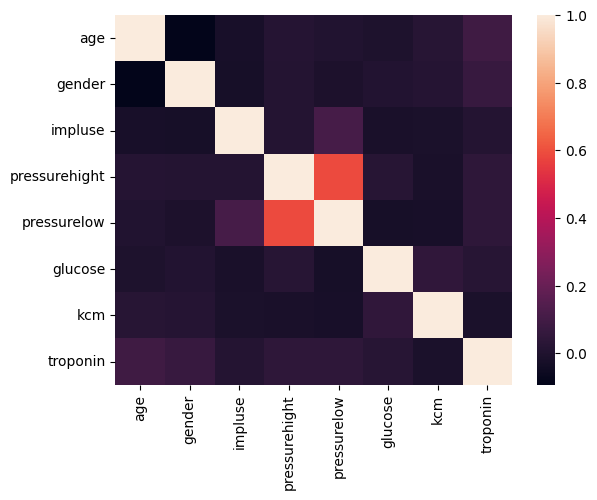

In [10]:
# import seaborn as sns
# import matplotlib as plt
corr = df.corr()
sns.heatmap(corr, 
xticklabels=corr.columns.values,
yticklabels=corr.columns.values)

In [11]:
#set up the model
# from keras.models import Sequential
# from keras.layers import Dense
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(8,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
#compile the model
model.compile(loss='binary_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])
model.fit(X_train, y_train,epochs=200, batch_size=1, verbose=1)

Epoch 1/200
883/883 [==============================] - 1s 629us/step - loss: 0.6766 - accuracy: 0.6070
Epoch 2/200
883/883 [==============================] - 1s 604us/step - loss: 0.6618 - accuracy: 0.6161
Epoch 3/200
883/883 [==============================] - 1s 638us/step - loss: 0.6553 - accuracy: 0.6161
Epoch 4/200
883/883 [==============================] - 1s 609us/step - loss: 0.6478 - accuracy: 0.6161
Epoch 5/200
883/883 [==============================] - 1s 645us/step - loss: 0.6362 - accuracy: 0.6161
Epoch 6/200
883/883 [==============================] - 1s 629us/step - loss: 0.6235 - accuracy: 0.6161
Epoch 7/200
883/883 [==============================] - 1s 638us/step - loss: 0.6086 - accuracy: 0.6195
Epoch 8/200
883/883 [==============================] - 1s 632us/step - loss: 0.5921 - accuracy: 0.6217
Epoch 9/200
883/883 [==============================] - 1s 615us/step - loss: 0.5773 - accuracy: 0.6501
Epoch 10/200
883/883 [==============================] - 1s 616us/step - l

In [13]:
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

[array([[-1.37331545e-01,  1.69650868e-01,  4.66278911e-01,
         1.21856682e-01,  1.55530795e-01,  7.03095123e-02,
        -2.75563151e-01,  9.49743241e-02],
       [-2.44198203e+00, -4.44542080e-01,  2.47444892e+00,
         2.95432973e+00,  3.28037238e+00, -1.97999120e-01,
         2.22305775e-01,  2.17366076e+00],
       [ 4.49108541e-01, -4.18780029e-01,  5.40207863e-01,
        -4.21370491e-02, -4.67410892e-01, -4.54903811e-01,
         1.61878318e-01, -4.83728200e-02],
       [ 9.23129022e-01,  3.97422940e-01,  3.37673008e-01,
         6.61013823e-04, -4.24447984e-01, -6.45348370e-01,
        -6.36001304e-02,  1.92399412e-01],
       [ 4.91239160e-01, -1.13945514e-01, -1.82158336e-01,
         2.52882808e-01,  5.71267307e-01,  4.92935061e-01,
        -5.43194413e-01, -6.83944598e-02],
       [ 2.26374924e-01, -6.50271356e-01, -4.85623181e-01,
        -2.17649043e-01,  3.78644228e-01,  1.77856609e-01,
        -4.64455158e-01, -8.05692375e-02],
       [-6.97447658e-01,  1.73030

In [14]:
y_pred = model.predict(X_test)


14/14 [==============================] - 0s 808us/step


In [15]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

14/14 [==============================] - 0s 769us/step - loss: 0.7460 - accuracy: 0.7890
[0.7459637522697449, 0.78899085521698]
